In [2]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [3]:
import pandas as pd

In [5]:
trades_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [16]:
print(trades_df.columns)
print(sentiment_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [17]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
sentiment_df.head()

#Converting Timestamps to DateFormat

In [20]:
#Convert timestamp in trade date
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'],format='%d-%m-%Y %H:%M')
trades_df['Date'] = trades_df['Timestamp IST'].dt.date # Create date Column

In [21]:
#Convert 'date' column in sentiment data
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

Merge on Data

In [22]:
#Merge the datasets on the date
merged_df = trades_df.merge(sentiment_df, left_on='Date', right_on='date', how='left')

In [23]:
#Preview Merged Data
merged_df[['Date', 'classification', 'Closed PnL', 'Size USD', 'Fee']].head()

,Date,classification,Closed PnL,Size USD,Fee
0,2024-12-02,Extreme Greed,0.0,7872.16,0.345404
1,2024-12-02,Extreme Greed,0.0,127.68,0.005600
2,2024-12-02,Extreme Greed,0.0,1150.63,0.050431
3,2024-12-02,Extreme Greed,0.0,1142.04,0.050043
4,2024-12-02,Extreme Greed,0.0,69.75,0.003055


In [40]:
#Making Columns Names Easier
merged_df.rename(columns={
    'classification': 'Sentiment',
    'Closed PnL' : 'PnL',
    'Size USD': 'TradeValue',
    'Fee': 'TradingFee'
}, inplace=True)

## Analysis

In [38]:
#Averge PnL by Market Sentiment
merged_df.groupby('Sentiment')['PnL'].mean()


,PnL
Sentiment,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [43]:
#Average Trade Value(USD) by Sentiment
merged_df.groupby('Sentiment')['TradingValue'].mean()


,TradingValue
Sentiment,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


In [44]:
#Total Trades During Each Sentiment
merged_df['Sentiment'].value_counts()

,count
Sentiment,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


# Visualizing

In [55]:
import numpy as np

lower_percentile = merged_df['PnL'].quantile(0.05)
upper_percentile = merged_df['PnL'].quantile(0.95)

filtered_df = merged_df[
    (merged_df['PnL'] >= lower_percentile) &
    (merged_df['PnL'] <= upper_percentile)
]

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.makedirs("outputs", exist_ok=True)

/tmp/ipython-input-3125914494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Sentiment', y='PnL', palette='Set2')


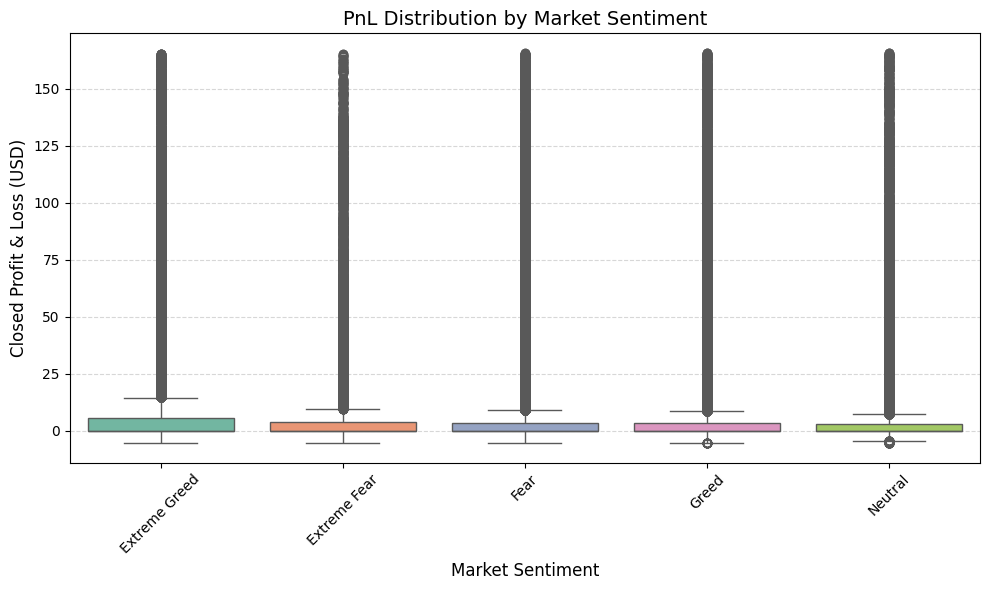

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df, x='Sentiment', y='PnL', palette='Set2')
plt.title('PnL Distribution by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Closed Profit & Loss (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/pnl_by_sentiment.png")
plt.show()

# Average PnL Per Sentiment

/tmp/ipython-input-1025592589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='coolwarm')


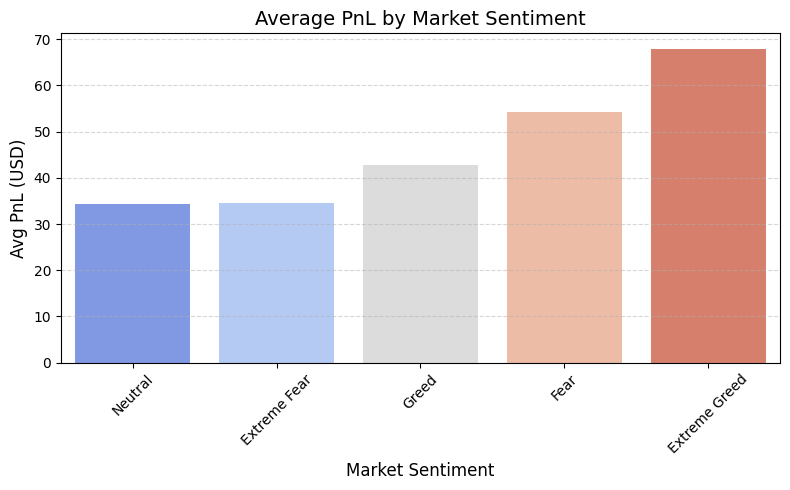

In [58]:
avg_pnl = merged_df.groupby('Sentiment')['PnL'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='coolwarm')

plt.title('Average PnL by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Avg PnL (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("outputs/avg_pnl_by_sentiment.png")
plt.show()


# Volume vs Sentiment

In [59]:
#Group By Sentiment and Calculate Avergae Trading Value
volume_sentiment = merged_df.groupby('Sentiment')['TradingValue'].mean().reset_index()

/tmp/ipython-input-3293003986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='TradingValue', data=volume_sentiment, palette='coolwarm')


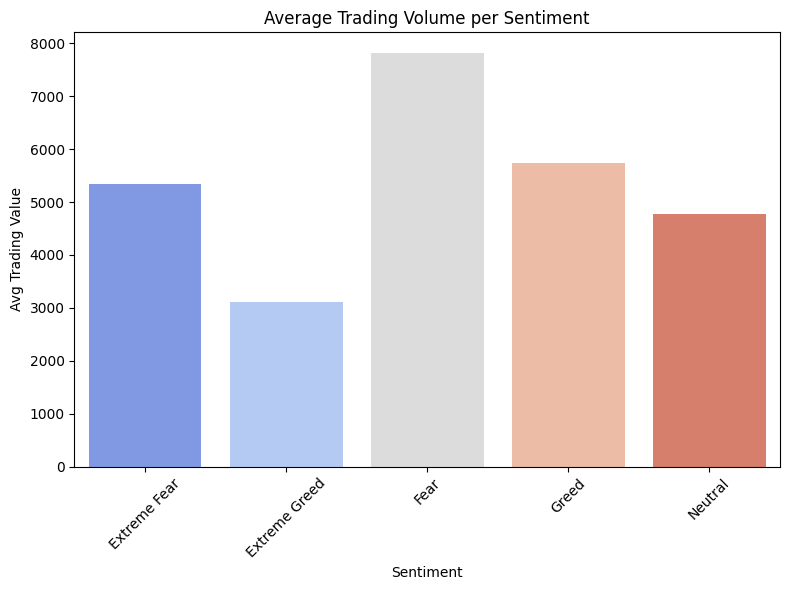

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sentiment', y='TradingValue', data=volume_sentiment, palette='coolwarm')
plt.title('Average Trading Volume per Sentiment')
plt.ylabel('Avg Trading Value')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Risk(Variance of PnL) per Sentiment

In [62]:
#Group By Sentiment and Calculate STD Deviatiion of PnL
risk_sentiment = merged_df.groupby('Sentiment')['PnL'].std().reset_index()
risk_sentiment.columns = ['Sentiment', 'PnL StdDev']

/tmp/ipython-input-4101694977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='PnL StdDev', data=risk_sentiment, palette='YlOrRd')


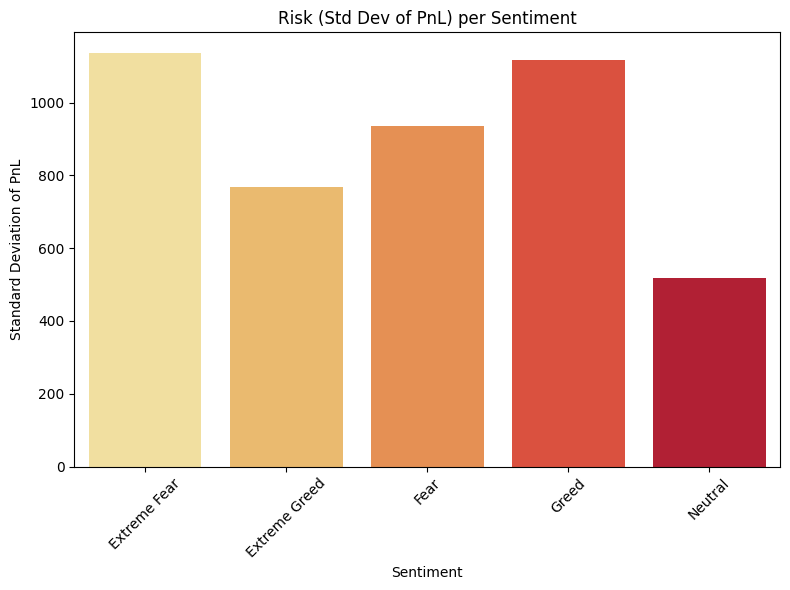

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sentiment', y='PnL StdDev', data=risk_sentiment, palette='YlOrRd')
plt.title('Risk (Std Dev of PnL) per Sentiment')
plt.ylabel('Standard Deviation of PnL')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Trade Direction (Long vs Short) by Sentiment

In [64]:
#Count of Long/Short Grouped by Sentiment
direction_df = merged_df.groupby(['Sentiment','Side']).size().reset_index(name='Count')

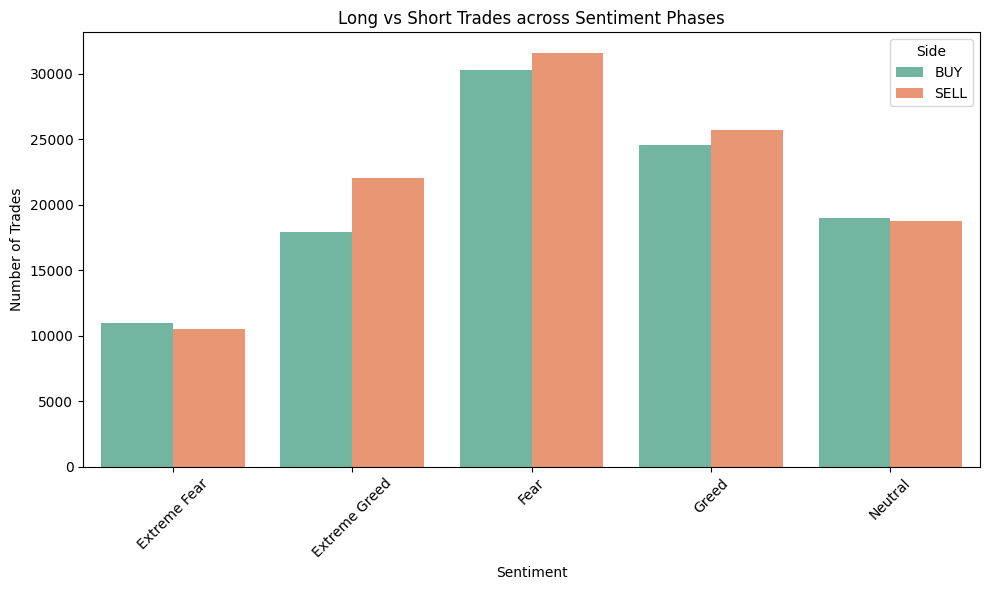

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sentiment', y='Count', hue='Side', data=direction_df, palette='Set2')
plt.title('Long vs Short Trades across Sentiment Phases')
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hidden Trend #1

### Profitability per Trade Direction vs Sentiment

In [66]:
#Average PnL by Sentiment and Side
pnl_by_direction = merged_df.groupby(['Sentiment', 'Side'])['PnL'].mean().reset_index()

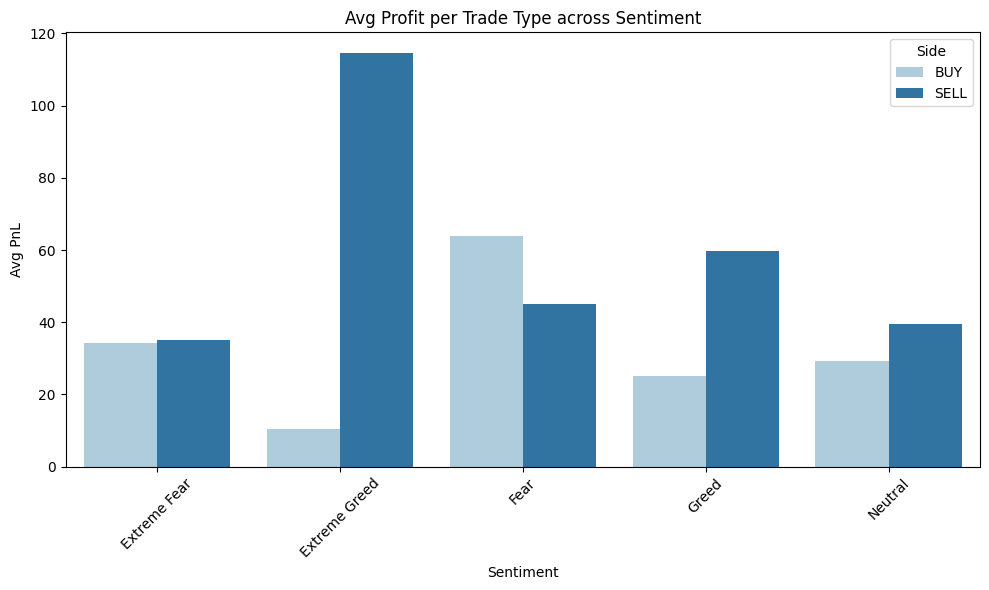

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sentiment', y='PnL', hue='Side', data=pnl_by_direction, palette='Paired')
plt.title('Avg Profit per Trade Type across Sentiment')
plt.ylabel('Avg PnL')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hidden Trend #2- Volume per Trade vs Sentiment

In [71]:
volume_by_sentiment = merged_df.groupby('Sentiment')['Size Tokens'].mean().reset_index()

/tmp/ipython-input-3577183590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Size Tokens', data=volume_by_sentiment, palette='coolwarm')


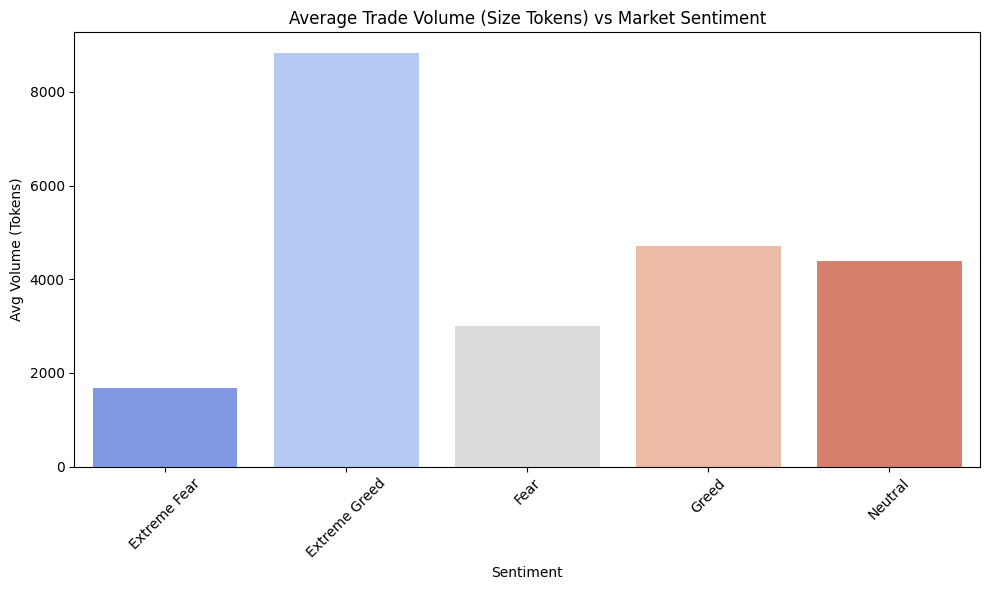

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Size Tokens', data=volume_by_sentiment, palette='coolwarm')
plt.title('Average Trade Volume (Size Tokens) vs Market Sentiment')
plt.ylabel('Avg Volume (Tokens)')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()